In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy.stats import bernoulli, binom

# Part 1: Empirical Learning Rates for the Exponential Weights Algorithm

In [21]:
class EWAlg:
    def __init__(self, epsilon, k, h):
        self.weights = np.ones(k)
        self.payoffs = np.zeros(k)
        self.h = h
        self.k = k
        self.epsilon = epsilon
        self.sumWeights = np.sum(self.weights)
        self.probs = self.weights/self.sumWeights

    def getAction(self):
        j = np.random.choice(self.k, 1, p = self.probs)
        return j.item()
    
    def update(self, payoffs):
        for j in range(len(payoffs)):
            curPayoff = payoffs[j]
            self.payoffs[j] = self.payoffs[j] + curPayoff
            newWeight = (1+self.epsilon)**(self.payoffs[j]/self.h)
            self.weights[j] = newWeight
        self.sumWeights = np.sum(self.weights)
        if(self.epsilon > 10):
            self.weights = self.weights/self.sumWeights
            self.sumWeights = np.sum(self.weights)
        self.probs = self.weights/self.sumWeights
        return


In [92]:
def MonteCarlo(numTrials, payoffGenerator, epsilon, k, h, n):
    avgFinalPayoff = 0
    avgRegretPerRound = [[] for i in range(numTrials)]
    for trial in range(numTrials):
        alg = EWAlg(epsilon, k, h)
        finalPayoff = 0
        actionPayoffs = np.zeros(k)
        generator = payoffGenerator(k)
        regretPerRound = np.zeros(n)
        for i in range(n):
            payoffs = generator.generate()
            j = alg.getAction()
            myPayoff = payoffs[j]
            actionPayoffs += payoffs
            alg.update(payoffs)
            finalPayoff += myPayoff
            OPT = max(actionPayoffs)
            regret = (OPT - finalPayoff).item() / (i+1)
            regretPerRound[i] = regret
        avgFinalPayoff += finalPayoff
        avgRegretPerRound[trial] = regretPerRound
    return avgFinalPayoff/numTrials, np.mean(avgRegretPerRound, axis=0)

## Adversarial Fair Payoffs

In each round i:

Draw a payoff x ~ U[0,1] (i.e., from the uniform distribution on interval [0,1])

Assign this payoff to the action j* that has the smallest total payoff so far, i.e., j* = argminj Vji-1 where Vji = Σir=1 vji. 
(All other actions get 0 payoff in round i.)

In [83]:
class AdversarialFair:
    def __init__(self, k):
        self.totalPayoffs = np.zeros(k)
        self.k = k
        
    def generate(self):
        adversarialPayoffs = np.zeros(self.k)
        x = np.random.rand(1)
        least = np.argmin(self.totalPayoffs)
        adversarialPayoffs[least] = x
        self.totalPayoffs = self.totalPayoffs + adversarialPayoffs
        return adversarialPayoffs

In [93]:
h = 1 # fixed
# hyperparameters
k = 10
n = 100
epsilons = [0, 0.1, 0.1517, 0.2, 0.4, 0.7, 1, 2, 10, 1000] # to be studied
monteCarloBound = 1000

epsilonPayoffs = []
epsilonRegretPerRound = []
for epsilon in epsilons:
    finalPayoff, regretPerRound = MonteCarlo(monteCarloBound, AdversarialFair, epsilon, k, h, n)
    epsilonPayoffs.append(finalPayoff)
    epsilonRegretPerRound.append(regretPerRound)

epsilonAvgRegrets = [i[99] for i in epsilonRegretPerRound]
print(epsilons)
print(epsilonPayoffs)
print(epsilonAvgRegrets)

[0, 0.1, 0.1517, 0.2, 0.4, 0.7, 1, 2, 10, 1000]
[5.021331057344437, 4.854779713890151, 4.712226813345121, 4.732426387970881, 4.524155116124724, 4.275483303193093, 4.000157959780795, 3.47146802384012, 2.1797416916941157, 0.27668586806404927]
[0.0037957532483120903, 0.005610899097244416, 0.006798902168540132, 0.006915209057834647, 0.008852640114579454, 0.011437649334969548, 0.014163045095802698, 0.01938075008810453, 0.03241022147871724, 0.051372250204964776]


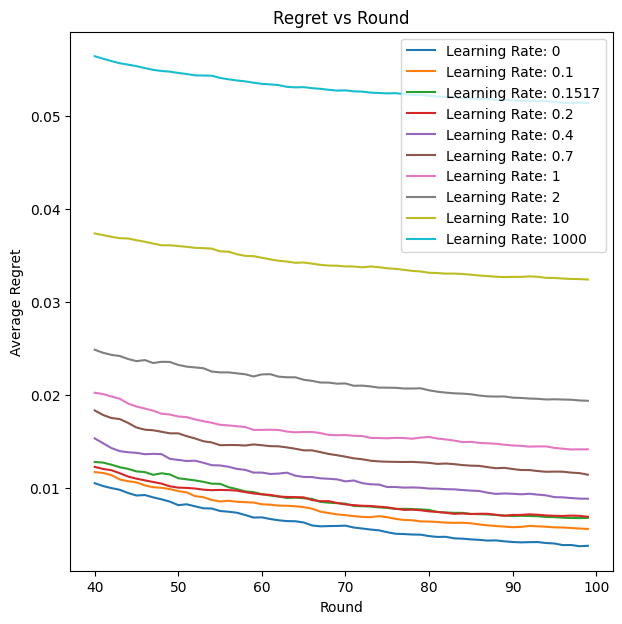

In [96]:
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)

for i in range(len(epsilons)):
    plt.plot(np.arange(40, n), epsilonRegretPerRound[i][40:], label = "Learning Rate: "+ str(epsilons[i]))
plt.title('Regret vs Round')
plt.xlabel('Round')
plt.ylabel('Average Regret')
plt.legend()
plt.show()

### Graphs for Adversarial Payoffs

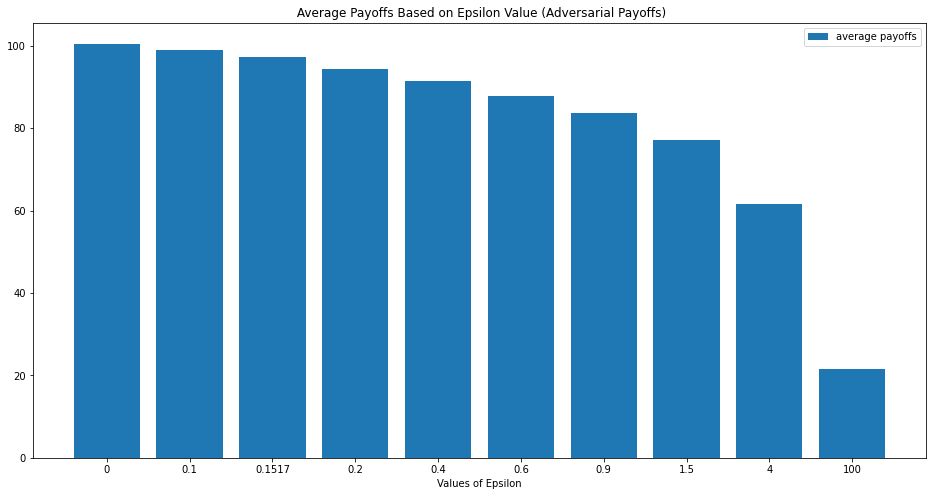

In [15]:
X_axis = np.arange(len(epsilons))
f, ax = plt.subplots(figsize=(16,8)) # set the size that you'd like (width, height)

plt.bar(X_axis, avgPayoffs, label = "average payoffs")

plt.xticks(X_axis, epsilons)
plt.xlabel("Values of Epsilon")
# plt.ylabel("Expected Utility")
plt.title(" Average Payoffs Based on Epsilon Value (Adversarial Payoffs)")
plt.legend()
plt.show()

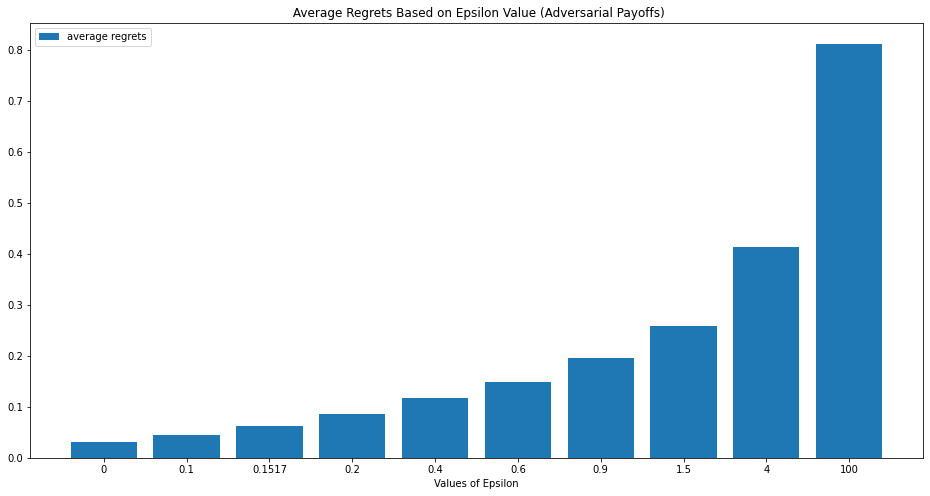

In [16]:
X_axis = np.arange(len(epsilons))
f, ax = plt.subplots(figsize=(16,8)) # set the size that you'd like (width, height)

plt.bar(X_axis, avgRegrets, label = "average regrets")
plt.xticks(X_axis, epsilons)
plt.xlabel("Values of Epsilon")
# plt.ylabel("Expected Utility")
plt.title(" Average Regrets Based on Epsilon Value (Adversarial Payoffs)")
plt.legend()
plt.show()


/var/folders/r2/zpk7_6mj6995g1gtd80hvc0w0000gn/T/ipykernel_4488/3548613573.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(epsilons), avgPayoffs, label = 'Size 1', color = "red")


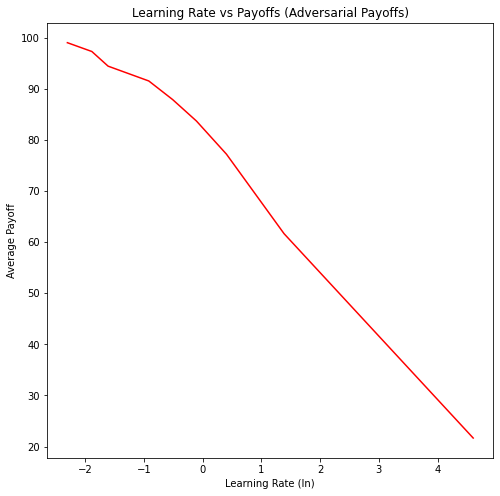

/var/folders/r2/zpk7_6mj6995g1gtd80hvc0w0000gn/T/ipykernel_4488/3548613573.py:14: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(epsilons),avgRegrets)


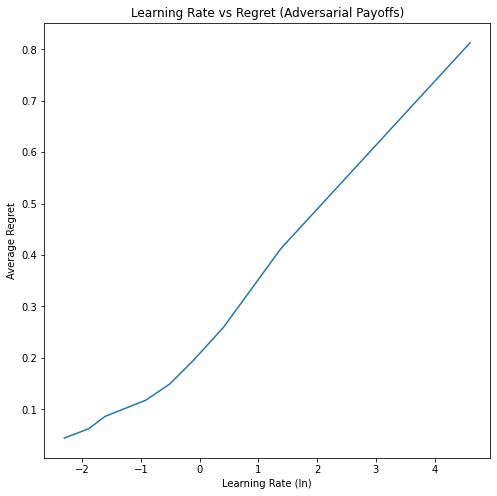

In [17]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

plt.plot(np.log(epsilons), avgPayoffs, label = 'Size 1', color = "red")
plt.title('Learning Rate vs Payoffs (Adversarial Payoffs)')
plt.xlabel('Learning Rate (ln)')
plt.ylabel('Average Payoff')
plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.plot(np.log(epsilons),avgRegrets)
plt.title('Learning Rate vs Regret (Adversarial Payoffs)')
plt.xlabel('Learning Rate (ln)')
plt.ylabel('Average Regret')
plt.show()

## Bernoulli Payoffs

Fix a probability for each action p1,...,pk with each pk in [0,1/2].

In each round i, draw the payoff of each action j as vji ~ B(pj) (i.e, from the Bernoulli distribution with probability pj of being 1 and probability 1-pj of being 0).

In [97]:
class Bernoulli:
    def __init__(self, k):
        self.k = k
        payoffProbs = np.random.uniform(0, 0.5, k)
        self.bernouliPayoffs = [bernoulli(p) for p in payoffProbs]
        
    def generate(self):
        payoffs = np.array([b.rvs(1) for b in self.bernouliPayoffs]).flatten()
        return payoffs

In [98]:
h = 1 # fixed
# hyperparameters
k = 10
n = 100
epsilons = [0, 0.1, 0.1517, 0.2, 0.4, 0.7, 1, 2, 10, 1000] # to be studied
monteCarloBound = 10

epsilonPayoffs = []
epsilonRegretPerRound = []
for epsilon in epsilons:
    finalPayoff, regretPerRound = MonteCarlo(monteCarloBound, Bernoulli, epsilon, k, h, n)
    epsilonPayoffs.append(finalPayoff)
    epsilonRegretPerRound.append(regretPerRound)

epsilonAvgRegrets = [i[99] for i in epsilonRegretPerRound]
print(epsilons)
print(epsilonPayoffs)
print(epsilonAvgRegrets)

[0, 0.1, 0.1517, 0.2, 0.4, 0.7, 1, 2, 10, 1000]
[25.6, 32.4, 31.3, 36.0, 39.0, 42.1, 42.6, 40.6, 39.5, 48.1]
[0.20299999999999999, 0.144, 0.11900000000000004, 0.132, 0.089, 0.07100000000000002, 0.047, 0.05, 0.041999999999999996, 0.048]


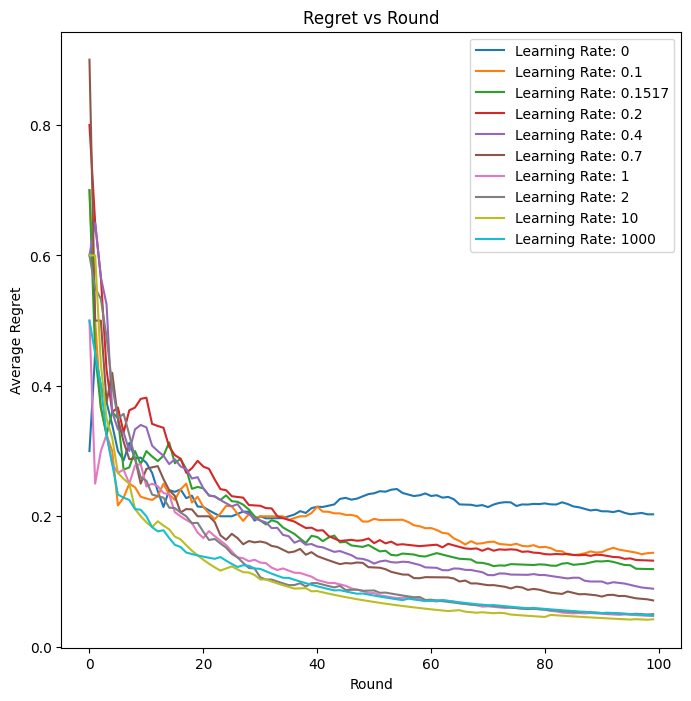

In [100]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

for i in range(len(epsilons)):
    plt.plot(np.arange(n), epsilonRegretPerRound[i], label = "Learning Rate: "+str(epsilons[i]))
plt.title('Regret vs Round')
plt.xlabel('Round')
plt.ylabel('Average Regret')
plt.legend()
plt.show()

In [21]:
# data source: http://ergast.com/mrd/
# f1Results = pd.read_csv("/Users/prabhavjain/Downloads/f1db_csv/constructor_results.csv")
# f1Races = pd.read_csv("/Users/prabhavjain/Downloads/f1db_csv/races.csv")
# f1Data = pd.merge(f1Results, f1Races, how="left", on="raceId")
# f1Data = f1Data[f1Data['year'] > 2018]
# f1Data = f1Data.drop(columns=['fp1_date', 'fp2_date', 'fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'])
# f1Data = f1Data.drop(columns=['constructorResultsId', 'raceId', 'url', 'time', 'name', 'circuitId', 'round', 'status', 'year'])
# constructorID = [9, 6, 210, 4, 131, 51, 211, 5, 1, 3, 213, 117, 214]
# constructorNames = ["Red Bull", "Ferrari", "Haas", "Alpine", "Mercedes", "Alfa Romeo", "Aston Martin", "Alpha Tauri", "Mclaren", "Williams", "Alpha Tauri", "Aston Martin", "Alpine"]
# f1Data['constructorId'] = f1Data['constructorId'].replace(constructorID, constructorNames)
# f1Data['points'] = f1Data['points'].astype('int')
# f1Data = f1Data.pivot(index='date', columns='constructorId', values='points')
# # f1Data.to_csv("/Users/prabhavjain/Northwestern Google Drive/CS 332/Online-Markets/f1Data.csv")

# to load data for future
# f1Data = pd.read_csv("/Users/allisonrhee/Online-Markets/f1Data.csv")

In [ ]:
class F1Data:
    def __init__(self, k):
        self.k = k
        self.count = 0
        data = pd.read_csv("/Users/prabhavjain/Northwestern Google Drive/CS 332/Online-Markets/f1Data.csv")
        self.f1Data = np.array(data.erase[])

    def generate(self):
        payoffs = 
        return payoffs

In [79]:
f1Data = pd.read_csv("/Users/prabhavjain/Northwestern Google Drive/CS 332/Online-Markets/f1Data.csv")
f1Payoffs = np.array(f1Data)
f1Payoffs = f1Payoffs 
print(f1Payoffs)

[['2019-03-31' 6 2 0 1 26 0 8 43 16 0]
 ['2019-04-14' 2 1 6 4 25 0 0 43 21 0]
 ['2019-04-28' 1 0 0 10 26 0 10 43 12 0]
 ['2019-05-12' 0 2 0 0 22 7 4 44 23 0]
 ['2019-05-26' 0 10 2 0 18 1 8 40 23 0]
 ['2019-06-09' 0 1 14 2 33 0 0 38 14 0]
 ['2019-06-23' 6 0 4 0 26 0 10 43 13 0]
 ['2019-06-30' 3 0 0 0 30 0 12 25 32 0]
 ['2019-07-14' 4 2 7 0 15 0 8 44 22 0]
 ['2019-07-28' 0 23 0 12 18 10 10 2 26 1]
 ['2019-08-04' 6 1 0 0 27 0 12 29 27 0]
 ['2019-09-01' 0 8 4 9 38 0 0 33 10 0]
 ['2019-09-08' 2 0 22 6 25 0 1 34 12 0]
 ['2019-09-22' 1 4 2 0 43 0 6 22 23 0]
 ['2019-09-29' 0 0 1 6 15 2 12 44 22 0]
 ['2019-10-13' 0 7 0 6 26 0 10 41 12 0]
 ['2019-10-27' 0 2 5 6 31 0 0 40 18 0]
 ['2019-11-03' 0 0 10 1 13 0 10 43 25 0]
 ['2019-11-17' 22 19 8 2 0 0 19 6 25 0]
 ['2019-12-01' 0 2 0 6 25 0 5 38 26 0]
 ['2020-07-05' 2 6 4 8 19 0 26 37 0 0]
 ['2020-07-12' 0 1 4 14 0 0 13 43 27 0]
 ['2020-07-19' 0 0 4 18 8 1 2 41 28 0]
 ['2020-08-02' 0 6 20 2 16 0 10 25 23 0]
 ['2020-08-09' 0 1 4 14 12 0 2 34 35 0]
 ['20

In [25]:
h = 58 # fixed
# hyperparameters
k = 10 # ten constructors
n = 82 # number of races
epsilons = [0, 1000, 0.1675717936] # adversarial optimal, bernoulli optimal, theoretical optimal
monteCarloBound = 1000
f1Payoffs = np.array(f1Data)

avgPayoffs = []
avgRegrets = []
for epsilon in epsilons:
    sumPayoff = 0
    sumRegret = 0   
    for i in range(monteCarloBound):
        alg = EWAlg(epsilon, k, h)
        totalPayoffs = np.zeros(k)
        myPayoff = 0
        for iPayoff in f1Payoffs:
            iPayoff = iPayoff[1:] #remove the date from first element
            totalPayoffs = totalPayoffs + iPayoff
            j = alg.getAction()
            myPayoff += iPayoff[j]
            alg.update(iPayoff)

        OPT = max(totalPayoffs)
        regret = (OPT - myPayoff) / n
        sumPayoff += myPayoff
        sumRegret += regret
    avgPayoffs.append(sumPayoff/n)
    avgRegrets.append(sumRegret/n)

print(epsilons)
print(avgPayoffs)
print(avgRegrets)

[0, 1000, 0.1675717936]
[10240.365853658537, 29293.0, 20825.40243902439]
[237.9967281380129, 5.647531231409878, 108.91091612135635]


## Adversarial Generative Model

In [40]:
h = 1 # fixed
# hyperparameters
k = 10
n = 300
epsilons = [0, 0.1517, 1000] # to be studied
monteCarloBound = 100

avgPayoffs = []
avgRegrets = []
epsilonRegrets = []
for epsilon in epsilons:
    sumPayoff = 0
    sumRegret = 0  
    regretOverTime = [0 for i in range(monteCarloBound)]
    for z in range(monteCarloBound):
        alg = EWAlg(epsilon, k, h)
        totalPayoffs = np.zeros(k)
        myPayoff = 0
        regrets = np.zeros(n)
        for i in range(n):
            # generate adversarial payoffs
            adversarialPayoffs = np.zeros(k)
            x = np.random.rand(1)
            if (totalPayoffs[0] > totalPayoffs[1]): adversarialPayoffs[1] += x
            else : adversarialPayoffs[0] += x
            totalPayoffs = totalPayoffs + adversarialPayoffs
            j = alg.getAction()
            myPayoff += adversarialPayoffs[j]
            alg.update(adversarialPayoffs)
            OPT = max(totalPayoffs)
            regret = (OPT - myPayoff).item() / (i + 1)
            regrets[i] = regret
        regretOverTime[z] = regrets
        OPT = max(totalPayoffs)
        regret = (OPT - myPayoff).item() / n
        sumPayoff += myPayoff
        sumRegret += regret
    avgPayoffs.append(sumPayoff/n)
    avgRegrets.append(sumRegret/n)
    regretOverTime = np.mean(regretOverTime, axis=0)
    epsilonRegrets.append(regretOverTime)

print(epsilons)
print(avgPayoffs)
print(avgRegrets)

[0, 0.1517, 1000]
[4.980148102973924, 20.680244949125022, 8.207890100529767]
[0.06627078330544403, 0.014237631203023824, 0.055900127972381725]


In [36]:
print(regretOverTime[0]
)

0.49455645166157197


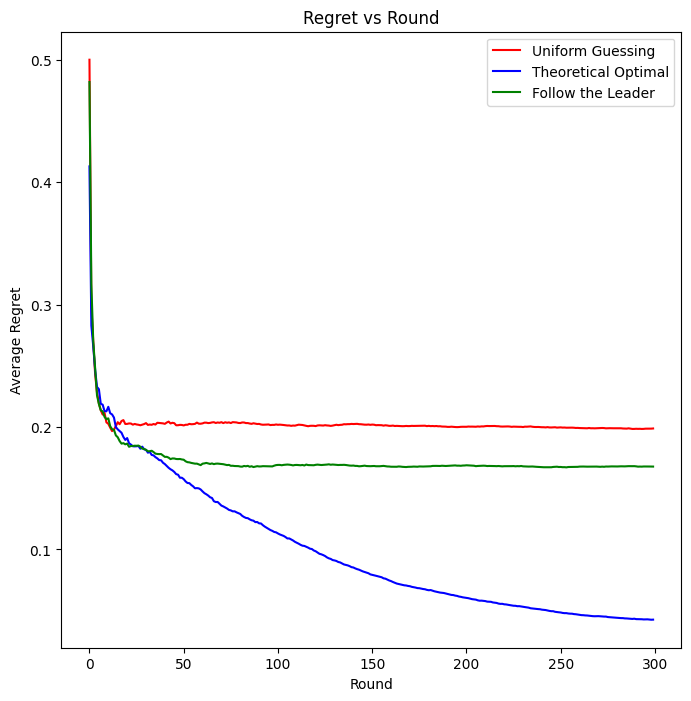

In [43]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

plt.plot(np.arange(n), epsilonRegrets[0], color = "red", label = "Uniform Guessing")
plt.plot(np.arange(n), epsilonRegrets[1], color = "blue", label = "Theoretical Optimal")
plt.plot(np.arange(n), epsilonRegrets[2], color = "green", label = "Follow the Leader")
plt.title('Regret vs Round')
plt.xlabel('Round')
plt.ylabel('Average Regret')
plt.legend()
plt.show()